In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
mlb = pd.read_csv("mlbPayroll2022.txt")
mlb = pd.read_csv("mlbPayroll2022.txt")
mlb = mlb.drop("Unnamed: 0", axis = 1)
#The last player has missing data and since we have 841 more entries, it's okay not to include him in the this analysis
mlb = mlb[0:841]

In [45]:
mlb["Salary"] = mlb["Adj. Salary"].str.replace('$', '')
mlb["Salary"] = mlb["Salary"].str.replace(',', '')
mlb["Salary"] = mlb["Salary"].astype(float)
mlb = mlb.drop("Adj. Salary", axis = 1)

<ipython-input-45-c30b739d295d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mlb["Salary"] = mlb["Adj. Salary"].str.replace('$', '')


In [46]:
mlb["Position"] = mlb["Pos."] 
mlb = mlb.drop("Pos.", axis = 1)

In [47]:
mlb = mlb[mlb["Position"] != "RP/CL"]
mlb = mlb[mlb["Position"] != "OF"]
mlb = mlb[mlb["Position"] != "P"]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


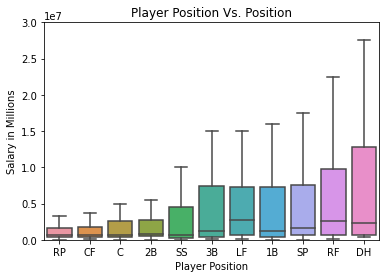

In [49]:
mlbbox = sns.boxplot(mlb["Position"], mlb["Salary"], order = ["RP", "CF", "C", "2B", "SS", "3B", "LF", "1B", "SP", "RF", "DH"], showfliers = False)
mlbbox.set_ylim(0, 30000000)
plt.title("Player Position Vs. Position")
plt.ylabel("Salary in Millions")
plt.xlabel("Player Position")

plt.show()

In [40]:
# Ordinary Least Squares (OLS) model
model = ols('Salary ~ C(Position) + C(Status)', data=mlb).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Position),9.317542e+14,9.0,4.485283,9.341255e-06
C(Status),1.130645e+16,5.0,97.968687,1.598849e-79
Residual,1.738057e+16,753.0,NaN,NaN
